# Gather

In [1]:
#import major libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the twitter_archive_enhanced.csv file and 
# set it as a dataframe called df.
df = pd.read_csv("twitter-archive-enhanced.csv")
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
# Programmatically download the dog image prediction files from 
# the Udacity server using Request library
import os
import requests

# Save to a file
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [4]:
#open tsv file
images = pd.read_table('image_predictions/image-predictions.tsv',
                       sep='\t')

In [5]:
#Importing libraries
import tweepy
from tweepy import OAuthHandler
import json
import csv
import sys
import os
import time


# authentication pieces
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

In [6]:
#Twitter Query using tweet_id information from the df.

tweet_ids = list(df.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet,
                                      wait_on_rate_limit=True, 
                                      wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except: 
        print("Error for: " + str(tweet))

Error for: 892420643555336193
Error for: 892177421306343426
Error for: 891815181378084864
Error for: 891689557279858688
Error for: 891327558926688256
Error for: 891087950875897856
Error for: 890971913173991426
Error for: 890729181411237888
Error for: 890609185150312448
Error for: 890240255349198849
Error for: 890006608113172480
Error for: 889880896479866881
Error for: 889665388333682689
Error for: 889638837579907072
Error for: 889531135344209921
Error for: 889278841981685760
Error for: 888917238123831296
Error for: 888804989199671297
Error for: 888554962724278272
Error for: 888202515573088257
Error for: 888078434458587136
Error for: 887705289381826560
Error for: 887517139158093824
Error for: 887473957103951883
Error for: 887343217045368832
Error for: 887101392804085760
Error for: 886983233522544640
Error for: 886736880519319552
Error for: 886680336477933568
Error for: 886366144734445568
Error for: 886267009285017600
Error for: 886258384151887873
Error for: 886054160059072513
Error for:

Error for: 840698636975636481
Error for: 840696689258311684
Error for: 840632337062862849
Error for: 840370681858686976
Error for: 840268004936019968
Error for: 839990271299457024
Error for: 839549326359670784
Error for: 839290600511926273
Error for: 839239871831150596
Error for: 838952994649550848
Error for: 838921590096166913
Error for: 838916489579200512
Error for: 838831947270979586
Error for: 838561493054533637
Error for: 838476387338051585
Error for: 838201503651401729
Error for: 838150277551247360
Error for: 838085839343206401
Error for: 838083903487373313
Error for: 837820167694528512
Error for: 837482249356513284
Error for: 837471256429613056
Error for: 837366284874571778
Error for: 837110210464448512
Error for: 837012587749474308
Error for: 836989968035819520
Error for: 836753516572119041
Error for: 836677758902222849
Error for: 836648853927522308
Error for: 836397794269200385
Error for: 836380477523124226
Error for: 836260088725786625
Error for: 836001077879255040
Error for:

Error for: 805207613751304193
Error for: 804738756058218496
Error for: 804475857670639616
Error for: 804413760345620481
Error for: 804026241225523202
Error for: 803773340896923648
Error for: 803692223237865472
Error for: 803638050916102144
Error for: 803380650405482500
Error for: 803321560782307329
Error for: 803276597545603072
Error for: 802952499103731712
Error for: 802624713319034886
Error for: 802600418706604034
Error for: 802572683846291456
Error for: 802323869084381190
Error for: 802265048156610565
Error for: 802247111496568832
Error for: 802239329049477120
Error for: 802185808107208704
Error for: 801958328846974976
Error for: 801854953262350336
Error for: 801538201127157760
Error for: 801285448605831168
Error for: 801167903437357056
Error for: 801127390143516673
Error for: 801115127852503040
Error for: 800859414831898624
Error for: 800855607700029440
Error for: 800751577355128832
Error for: 800513324630806528
Error for: 800459316964663297
Error for: 800443802682937345
Error for:

Error for: 770069151037685760
Error for: 769940425801170949
Error for: 769695466921623552
Error for: 769335591808995329
Error for: 769212283578875904
Error for: 768970937022709760
Error for: 768909767477751808
Error for: 768855141948723200
Error for: 768609597686943744
Error for: 768596291618299904
Error for: 768554158521745409
Error for: 768473857036525572
Error for: 768193404517830656
Error for: 767884188863397888
Error for: 767754930266464257
Error for: 767500508068192258
Error for: 767191397493538821
Error for: 767122157629476866
Error for: 766864461642756096
Error for: 766793450729734144
Error for: 766714921925144576
Error for: 766693177336135680
Error for: 766423258543644672
Error for: 766313316352462849
Error for: 766078092750233600
Error for: 766069199026450432
Error for: 766008592277377025
Error for: 765719909049503744
Error for: 765669560888528897
Error for: 765395769549590528
Error for: 765371061932261376
Error for: 765222098633691136
Error for: 764857477905154048
Error for:

Error for: 736225175608430592
Error for: 736010884653420544
Error for: 735991953473572864
Error for: 735648611367784448
Error for: 735635087207878657
Error for: 735274964362878976
Error for: 735256018284875776
Error for: 735137028879360001
Error for: 734912297295085568
Error for: 734787690684657664
Error for: 734776360183431168
Error for: 734559631394082816
Error for: 733828123016450049
Error for: 733822306246479872
Error for: 733482008106668032
Error for: 733460102733135873
Error for: 733109485275860992
Error for: 732732193018155009
Error for: 732726085725589504
Error for: 732585889486888962
Error for: 732375214819057664
Error for: 732005617171337216
Error for: 731285275100512256
Error for: 731156023742988288
Error for: 730924654643314689
Error for: 730573383004487680
Error for: 730427201120833536
Error for: 730211855403241472
Error for: 730196704625098752
Error for: 729854734790754305
Error for: 729838605770891264
Error for: 729823566028484608
Error for: 729463711119904772
Error for:

Error for: 702276748847800320
Error for: 702217446468493312
Error for: 701981390485725185
Error for: 701952816642965504
Error for: 701889187134500865
Error for: 701805642395348998
Error for: 701601587219795968
Error for: 701570477911896070
Error for: 701545186879471618
Error for: 701214700881756160
Error for: 700890391244103680
Error for: 700864154249383937
Error for: 700847567345688576
Error for: 700796979434098688
Error for: 700747788515020802
Error for: 700518061187723268
Error for: 700505138482569216
Error for: 700462010979500032
Error for: 700167517596164096
Error for: 700151421916807169
Error for: 700143752053182464
Error for: 700062718104104960
Error for: 700029284593901568
Error for: 700002074055016451
Error for: 699801817392291840
Error for: 699788877217865730
Error for: 699779630832685056
Error for: 699775878809702401
Error for: 699691744225525762
Error for: 699446877801091073
Error for: 699434518667751424
Error for: 699423671849451520
Error for: 699413908797464576
Error for:

Error for: 683834909291606017
Error for: 683828599284170753
Error for: 683773439333797890
Error for: 683742671509258241
Error for: 683515932363329536
Error for: 683498322573824003
Error for: 683481228088049664
Error for: 683462770029932544
Error for: 683449695444799489
Error for: 683391852557561860
Error for: 683357973142474752
Error for: 683142553609318400
Error for: 683111407806746624
Error for: 683098815881154561
Error for: 683078886620553216
Error for: 683030066213818368
Error for: 682962037429899265
Error for: 682808988178739200
Error for: 682788441537560576
Error for: 682750546109968385
Error for: 682697186228989953
Error for: 682662431982772225
Error for: 682638830361513985
Error for: 682429480204398592
Error for: 682406705142087680
Error for: 682393905736888321
Error for: 682389078323662849
Error for: 682303737705140231
Error for: 682259524040966145
Error for: 682242692827447297
Error for: 682088079302213632
Error for: 682059653698686977
Error for: 682047327939461121
Error for:

Error for: 674265582246694913
Error for: 674262580978937856
Error for: 674255168825880576
Error for: 674082852460433408
Error for: 674075285688614912
Error for: 674063288070742018
Error for: 674053186244734976
Error for: 674051556661161984
Error for: 674045139690631169
Error for: 674042553264685056
Error for: 674038233588723717
Error for: 674036086168010753
Error for: 674024893172875264
Error for: 674019345211760640
Error for: 674014384960745472
Error for: 674008982932058114
Error for: 673956914389192708
Error for: 673919437611909120
Error for: 673906403526995968
Error for: 673887867907739649
Error for: 673716320723169284
Error for: 673715861853720576
Error for: 673711475735838725
Error for: 673709992831262724
Error for: 673708611235921920
Error for: 673707060090052608
Error for: 673705679337693185
Error for: 673700254269775872
Error for: 673697980713705472
Error for: 673689733134946305
Error for: 673688752737402881
Error for: 673686845050527744
Error for: 673680198160809984
Error for:

Error for: 668872652652679168
Error for: 668852170888998912
Error for: 668826086256599040
Error for: 668815180734689280
Error for: 668779399630725120
Error for: 668655139528511488
Error for: 668645506898350081
Error for: 668643542311546881
Error for: 668641109086707712
Error for: 668636665813057536
Error for: 668633411083464705
Error for: 668631377374486528
Error for: 668627278264475648
Error for: 668625577880875008
Error for: 668623201287675904
Error for: 668620235289837568
Error for: 668614819948453888
Error for: 668587383441514497
Error for: 668567822092664832
Error for: 668544745690562560
Error for: 668542336805281792
Error for: 668537837512433665
Error for: 668528771708952576
Error for: 668507509523615744
Error for: 668496999348633600
Error for: 668484198282485761
Error for: 668480044826800133
Error for: 668466899341221888
Error for: 668297328638447616
Error for: 668291999406125056
Error for: 668286279830867968
Error for: 668274247790391296
Error for: 668268907921326080
Error for:

In [7]:
import json

with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweet_data, outfile, 
              sort_keys = True,
              indent=4,
              ensure_ascii = False)

In [8]:
tweet_df = pd.read_json('tweet_json.txt',orient='index')

## Assess

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 0 entries
Empty DataFrame

## Clean

In [12]:
# Copy the dataframes # Copy t 
df_clean = df.copy()
images_clean = images.copy()
tweet_df_clean = tweet_df.copy()

In [13]:
# Missing Data
# replacing faulty names with None value or corrected Name
df_clean['name'].replace('the', 'None', inplace=True)
df_clean['name'].replace("light",'None', inplace=True)
df_clean['name'].replace("life",'None', inplace=True)
df_clean['name'].replace("an",'None', inplace=True)
df_clean['name'].replace("a",'None', inplace=True)
df_clean['name'].replace("by",'None', inplace=True)
df_clean['name'].replace("actually",'None', inplace=True)
df_clean['name'].replace("just",'None', inplace=True)
df_clean['name'].replace("getting",'None', inplace=True) 
df_clean['name'].replace("infuriating",'None', inplace=True) 
df_clean['name'].replace("old",'None', inplace=True) 
df_clean['name'].replace("all",'None', inplace=True) 
df_clean['name'].replace("this",'None', inplace=True) 
df_clean['name'].replace("very",'None', inplace=True) 
df_clean['name'].replace("mad",'None', inplace=True) 
df_clean['name'].replace("not",'None', inplace=True)
df_clean['name'].replace("one",'None', inplace=True)
df_clean['name'].replace("my",'None', inplace=True)
df_clean['name'].replace("O","O'Malley", inplace=True)
df_clean['name'].replace("quite","None", inplace=True)
df_clean['name'].replace("such","None", inplace=True)

In [14]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [15]:
# Identify how many tweets are retweets by the "retweeted_status" columns
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
df_clean[df_clean['retweeted_status_id'].notnull()==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [17]:
# remove these values from the dataframe using the drop() function
df_clean.drop(df_clean[df_clean['retweeted_status_id'].notnull()== True].index,inplace=True)

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [19]:
# DF table: Clean timestamp column
from datetime import datetime,timedelta

#what data type is the timestamp currently in?
type(df_clean['timestamp'].iloc[0])

str

In [20]:
#Use pd.to_datetime to convert the column from strings to DateTime objects.
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

#Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns 
#called Hour, Day, Month, and Year. You will create these columns based off of the timeStamp column, 
#reference the solutions if you get stuck on this step.

df_clean['date'] = df_clean['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
df_clean['time'] = df_clean['timestamp'].apply(lambda time: time.strftime('%H:%M'))

In [21]:
df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,08-01-2017,16:23


In [22]:
df_clean['stage'] = df[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

df_clean['stage'].replace("NoneNoneNoneNone","None ", inplace=True)
df_clean['stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
df_clean['stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
df_clean['stage'].replace("NoneNonepupperNone","pupper", inplace=True)
df_clean['stage'].replace("NoneNoneNonepuppo","puppo", inplace=True)

In [23]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,08-01-2017,16:23,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,08-01-2017,00:17,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,07-31-2017,00:18,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,07-30-2017,15:58,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,07-29-2017,16:00,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,07-29-2017,00:08,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,07-28-2017,16:27,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,07-28-2017,00:22,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,07-27-2017,16:25,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,07-26-2017,15:59,doggo


In [24]:
# remove unwanted columns from df_clean columns
df_clean.drop(['timestamp',
               'retweeted_status_user_id',
               'retweeted_status_id',
               'retweeted_status_timestamp',
               'in_reply_to_status_id',
               'in_reply_to_user_id',
               'in_reply_to_status_id',
               'expanded_urls',
               'source',
               'doggo',
               'floofer',
               'pupper',
               'puppo',
               'text'], axis=1,inplace=True)

In [25]:
df_clean.head()

,tweet_id,rating_numerator,rating_denominator,name,date,time,stage
0,892420643555336193,13,10,Phineas,08-01-2017,16:23,None
1,892177421306343426,13,10,Tilly,08-01-2017,00:17,None
2,891815181378084864,12,10,Archie,07-31-2017,00:18,None
3,891689557279858688,13,10,Darla,07-30-2017,15:58,None
4,891327558926688256,12,10,Franklin,07-29-2017,16:00,None


In [26]:
# Change the order (the index) of the df_clean columns
columnTitles = ['tweet_id', 
                'date', 
                'time',
                'name',
                'stage',
                'rating_numerator',
                'rating_denominator']
df_clean = df_clean.reindex(columns=columnTitles)

In [27]:
df_clean.head()

,tweet_id,date,time,name,stage,rating_numerator,rating_denominator
0,892420643555336193,08-01-2017,16:23,Phineas,None,13,10
1,892177421306343426,08-01-2017,00:17,Tilly,None,13,10
2,891815181378084864,07-31-2017,00:18,Archie,None,12,10
3,891689557279858688,07-30-2017,15:58,Darla,None,13,10
4,891327558926688256,07-29-2017,16:00,Franklin,None,12,10


In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2175 non-null int64
date                  2175 non-null object
time                  2175 non-null object
name                  2175 non-null object
stage                 2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
dtypes: int64(3), object(4)
memory usage: 135.9+ KB


In [29]:
df_clean.tweet_id = df_clean.tweet_id.astype(str)

In [30]:
type(df_clean['tweet_id'].iloc[0])

str

In [31]:
df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean['time'] = pd.to_datetime(df_clean['time'])

In [32]:
type(df_clean['date'].iloc[0])
type(df_clean['time'].iloc[0])

pandas._libs.tslib.Timestamp

In [33]:
df_clean['rating_numerator'] = df_clean['rating_numerator'].astype(float)
df_clean['rating_denominator'] = df_clean['rating_denominator'].astype(float)

In [34]:
type(df_clean['rating_numerator'].iloc[0])

numpy.float64

In [35]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2175 non-null object
date                  2175 non-null datetime64[ns]
time                  2175 non-null datetime64[ns]
name                  2175 non-null object
stage                 2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 135.9+ KB


In [36]:
tweet_df_clean.columns

Float64Index([], dtype='float64')

In [37]:
tweet_df_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

In [38]:
tweet_df_clean.columns

Index([], dtype='object')

In [39]:
type(df_clean['tweet_id'].iloc[0])

str

In [40]:
# Identify how many tweets are retweets by the "retweeted_status" columns
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 0 entries
Empty DataFrame

In [41]:
tweet_df_clean.head(10)


""


In [42]:
images_clean['p1'] = images_clean['p1'].str.replace('_', ' ')
images_clean['p2'] = images_clean['p2'].str.replace('_', ' ')
images_clean['p3'] = images_clean['p3'].str.replace('_', ' ')

In [43]:
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [44]:
images_clean['p1'] = images_clean['p1'].str.title()
images_clean['p2'] = images_clean['p2'].str.title()
images_clean['p3'] = images_clean['p3'].str.title()

In [45]:
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [46]:
images_clean.tweet_id = images_clean.tweet_id.astype(str)

In [47]:
type(images_clean['tweet_id'].iloc[0])

str

In [48]:
def df_merge():
    
    df_merge = pd.merge(df_merge, images_clean,on='tweet_id', how='inner')

In [49]:
df_merge

<function __main__.df_merge>

In [3]:
# --------------------
# READ DATA FROM FILE
# --------------------

# Read clean DataFrame from previously cleaned up CSV file
def pd():

    twitter_archive_clean = pd.read_csv('twitter_archive_master.csv')

In [5]:
# ---------------------------------------------------------
# SET UP THE DATAFRAME THAT WILL BE USED FOR VISUALIZATION
# ---------------------------------------------------------

def twitter_archive_clean():

# Create copy of twitter_archive_clean to work off of using only my variables of interest
    time_df = twitter_archive_clean[['timestamp', 'retweet_count', 'favorite_count', 'rating_numerator', 'rating_denominator']].copy()
# Set the index to be the timestamp so time is displayed properly in plots
time_df.set_index('timestamp', inplace=True)
# Create rating_ration variable by dividing the rating numerator by the deonominator to normalize scores which are not 
# out of 10
time_df['rating_ratio'] = time_df['rating_numerator']/time_df['rating_denominator']

NameError: name 'time_df' is not defined

In [51]:
df.to_csv('final_master.csv', index=False, header=None)

In [55]:
df.to_csv('final_document')

In [22]:
# Save to a file
def os():
    def df_clean():
    
        folder_name = 'Final_Documents'
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)
    
df_clean.to_csv('Final_Documents/twitter_archive_master.csv')
images_clean.to_csv('Final_Documents/image_prediction_master.csv')
tweet_df_clean.to_csv('Final_Documents/tweet_query_master.csv')
df_merge.to_csv('Final_Documents/final_master.csv')

NameError: name 'df_clean' is not defined

## Visualization

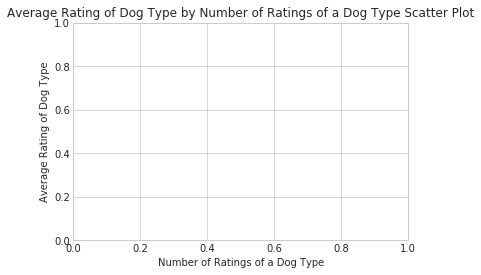

In [26]:
def df():
    
    df.plot(x='dog_type_count', y='dog_type_mean', kind='scatter')
plt.xlabel('Number of Ratings of a Dog Type')
plt.ylabel('Average Rating of Dog Type')
plt.title('Average Rating of Dog Type by Number of Ratings of a Dog Type Scatter Plot')

fig = plt.gcf()
#plt.savefig('X:/' + newName + '.png', 
fig.savefig('output2.png',bbox_inches='tight');

In [ ]:
# Read in the updated dataframes
df_master= pd.read_csv("Final_Documents/final_master.csv")
image_pred_df = pd.read_csv("Final_Documents/image_prediction_master.csv")